In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import umap
import phenograph

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [3]:
region = 'OB'
separate_region = False
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [2]:
importlib.reload(ptt)
region = 'OB'
compute_response = True
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [5]:
all_response

time              0         1         2         3         4         5    \
odor  trial                                                               
phe   0      0.111671  0.020020  0.037935 -0.051696  0.044313  0.061350   
      1     -0.016039  0.042544  0.027010 -0.010333  0.073079  0.022429   
      2      0.036656 -0.001921  0.033379  0.061679  0.033887  0.011455   
trp   0     -0.016655 -0.036077  0.013261  0.000994  0.010939 -0.068560   
      1      0.115006  0.117667  0.120905  0.137937  0.139693  0.066404   
      2      0.008514  0.040491  0.041911  0.020641 -0.001109  0.037889   
arg   0      0.052843  0.021715  0.016649  0.082691  0.032146  0.057789   
      1      0.124805  0.067575  0.015013 -0.004180  0.022199  0.104284   
      2      0.034702 -0.025150 -0.047762  0.026485 -0.015940 -0.005209   
tdca  0      0.081114  0.040946  0.040909  0.033901  0.014281  0.032405   
      1     -0.022595  0.049742  0.049929  0.025990  0.048690 -0.024197   
      2      0.040650  0.078142  0.053174  0.036588  0.102566  0.053320   
tca   0      0.066184  0.021590  0.057720  0.033459 -0.008378  0.023203   
      1     -0.023128  0.005924  0.003506  0.017292  0.079673  0.070499   
      2      0.138075  0.037960 -0.000498  0.087647  0.094680  0.024985   
gca   0      0.050394  0.070672  0.009028  0.072322  0.050995  0.109414   
      1     -0.058961 -0.010362 -0.023146  0.040526  0.035704  0.052141   
      2      0.063764  0.040530  0.097706  0.002713  0.103575  0.066412   
acsf  0      0.067630  0.023794 -0.003439  0.041568  0.019639 -0.005525   
      1      0.085867  0.084554  0.031646  0.013468 -0.013500  0.053433   
      2     -0.002924  0.090628  0.036090 -0.027413 -0.006479  0.062117   
spont 0      0.040297 -0.010173  0.023995  0.022087  0.035237  0.049673   
      1     -0.042850  0.028010  0.019860  0.024327 -0.015879 -0.002542   
      2     -0.025430  0.064878 -0.036679 -0.021130  0.037763  0.027391   

time              6         7         8         9    ...       155       156  \
odor  trial                                          ...                       
phe   0     -0.012008  0.066896  0.065890  0.031631  ... -0.002500 -0.061391   
      1      0.022608  0.029998  0.009120 -0.025909  ...  0.025641  0.078128   
      2      0.041908 -0.017795  0.069770  0.029242  ...  0.082622 -0.039674   
trp   0     -0.093539  0.127417 -0.047214 -0.019836  ...  0.246405  0.122066   
      1      0.063441  0.127836  0.082851  0.047228  ...  0.169355  0.123393   
      2      0.066059  0.051555  0.015653  0.081949  ...  0.096839  0.135652   
arg   0      0.023716  0.076717  0.061695  0.001150  ...  0.104538  0.151026   
      1     -0.006372  0.128708 -0.024294  0.083427  ...  0.109158  0.043309   
      2     -0.022486 -0.009795 -0.002078  0.014177  ...  0.044767  0.055906   
tdca  0      0.021993  0.072360  0.035286  0.074030  ...  0.127466  0.136266   
      1      0.014521 -0.043556  0.050970  0.004944  ...  0.123204  0.158736   
      2      0.041343  0.035282  0.104375 -0.045975  ...  0.226973  0.087534   
tca   0      0.069389  0.005563  0.014247  0.111325  ...  0.012176  0.087261   
      1      0.028587  0.038857 -0.066280  0.000724  ...  0.105208  0.036644   
      2      0.107778  0.060061  0.025398  0.049056  ...  0.056169  0.092559   
gca   0     -0.040726  0.040431  0.018550  0.061662  ...  0.087114  0.055727   
      1     -0.013633  0.007310  0.083386  0.071066  ...  0.094361  0.066344   
      2      0.060873  0.023510  0.030665  0.037874  ...  0.203386  0.099474   
acsf  0      0.072881 -0.022675  0.036036  0.040294  ...  0.088876  0.065013   
      1      0.044172 -0.013481  0.039952  0.050728  ...  0.040796  0.017725   
      2      0.093946  0.034828  0.045325 -0.008466  ...  0.025821 -0.004889   
spont 0      0.067657  0.033732  0.017068 -0.005924  ...  0.016067 -0.069917   
      1      0.030691 -0.036637 -0.022421  0.011157  ...  0.012601  0.056510   
      2      0.027423  0.010817  0.014529 -0.0267

In [79]:
all_dfovf_select_ob

time                                                 0         1         2    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     5       0.124669  0.307171 -0.256680   
                                        8       0.435329  0.772177 -0.291736   
                                        11     -0.070399  0.347863  0.292756   
                                        12      0.007183  0.434809  0.088401   
                                        16      0.156401  0.098130 -0.118343   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     215    -0.215098  0.080807 -0.167870   
                                        216     0.016946  0.165718  0.039703   
                                        217     0.219221  0.079106  0.068012   
                                        218    -0.234419 -0.207394 -0.023079   
                                        219     0.135326  0.006021 -0.120416   

time                                                 3         4         5    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     5      -0.060342  0.215111  0.435966   
                                        8      -0.041180  0.106638 -0.149039   
                                        11      0.073496  0.088917  0.243576   
                                        12      0.006559  0.318632 -0.170444   
                                        16     -0.028309  0.166817  0.173485   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     215     0.200757 -0.212774 -0.038153   
                                        216    -0.037389  0.202951  0.232591   
                                        217     0.234066  0.182055  0.014650   
                                        218    -0.132338 -0.262531 -0.263117   
                                        219     0.748882 -0.104618 -0.397807   

time                                                 6         7         8    \
fish_id               odor  trial plane neuron                                 
2021-02-05-DpOBEM-JH9 phe   0     0     5       0.563528 -0.084697  0.351917   
                                        8      -0.073894  0.214012  0.011671   
                                        11      0.092401  0.029222 -0.043704   
                                        12     -0.176170 -0.121720 -0.095405   
                                        16     -0.118437  0.185636 -0.035801   
...                                                  ...       ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     215    -0.217719 -0.585802 -0.270214   
                                        216     0.101741  0.030396 -0.126482   
                                        217    -0.024002  0.078485  0.410860   
                                        218     0.079050 -0.189501 -0.017408   
                                        219    -0.323274 -0.615518 -0.329124   

time                                                 9    ...       155  \
fish_id               odor  trial plane neuron            ...             
2021-02-05-DpOBEM-JH9 phe   0     0     5       0.054354  ... -0.264509   
                                        8      -0.077880  ... -0.004181   
                                        11      0.255228  ...  0.012867   
                                        12      0.023418  ...  0.082068   
                                        16      0.056167  ...  0.102302   
...                                                  ...  ...       ...   
2021-12-31-DpOBEM-N7  spont 2     3     215    -0.178033  ...  0.413926   
                                        216    -0.030292  ...  0.268918   
                                        217    -0.187060  ...  0.725346   
                                        218    -0.02

In [ ]:
all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
all_dfovf_select_rg.stack(level=['plane','neuron']).unstack(level='time')
all_dfovf_select_rg

In [78]:
all_dfovf_select

fish_id          2021-02-05-DpOBEM-JH9                                \
region                              Dp                                 
cond                           phe-arg                                 
plane                                0                                 
neuron                             1         2         3         4     
odor  trial time                                                       
phe   0     0                -0.087107  0.026763 -0.207659 -0.072826   
            1                -0.081762 -0.120955 -0.092794 -0.144551   
            2                 0.120060 -0.217178 -0.109698 -0.238825   
            3                -0.175427  0.113037  0.130574 -0.442386   
            4                -0.118987  0.196108 -0.328046 -0.412755   
...                                ...       ...       ...       ...   
spont 2     160               0.293570  0.068588 -0.027112 -0.355998   
            161               0.063551  0.654863 -0.159213 -0.483342   
            162               0.080605 -0.221400 -0.235401 -0.237495   
            163               0.012538 -0.067168 -0.039698 -0.409873   
            164              -0.009415 -0.087750 -0.307870 -0.332435   

fish_id                                                                       \
region                                                                         
cond                                                                           
plane                                                                          
neuron                 6         7         8         12        17        22    
odor  trial time                                                               
phe   0     0     0.300471  0.083526 -0.174538  0.133191  0.023182 -0.070228   
            1    -0.109048  0.274044 -0.202026  0.008752  0.017393  0.180616   
            2     0.189066  0.122991 -0.138202  0.122095 -0.118777  0.272963   
            3    -0.014164  0.012959 -0.083405 -0.172566 -0.177802 -0.051649   
            4     0.029926  0.253827 -0.166226 -0.066356 -0.216033  0.224134   
...                    ...       ...       ...       ...       ...       ...   
spont 2     160  -0.102270  0.544612  0.116239  0.087945 -0.227595 -0.004587   
            161  -0.089070 -0.267954  0.053144  0.167878 -0.126206  0.183377   
            162   0.083044  0.200667  0.018331  0.067741 -0.074319  0.084685   
            163  -0.081343 -0.044402 -0.011706  0.122219 -0.108430 -0.077645   
            164  -0.301080  0.112180 -0.043508  0.296861 -0.016430 -0.106499   

fish_id           ... 2022-02-20-DpOBEM-N11                                \
region            ...                    OB                                 
cond              ...                 naive                                 
plane             ...                     3                                 
neuron            ...                   231       232       233       237   
odor  trial time  ...                                                       
phe   0     0     ...              0.068711 -0.168194 -0.069901 -0.511720   
            1     ...              0.112043  0.205165 -0.133216  0.076860   
            2     ...             -0.067668 -0.310072  0.045154  0.041241   
            3     ...              0.027496 -0.018998 -0.026662  0.037531   
            4     ...             -0.023299 -0.062749  0.176533  0.001165   
...               ...                   ...       ...       ...       ...   
spont 2     160   ...             -0.153341 -0.064091 -0.223856  0.225243   
            161   ...              0.278868  0.071340 -0.056268  0.574195   
            162   ...              0.093927  0.052643  0.492674  0.172640   
            163   ...              0.073893  0.471599  0.003003  0.085298   
            164   ...              0.079057  0.060101  0.126914  0.221711   

fish_id                                                                       
region                   

In [3]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
#all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = dtpar.cond_list
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_idx = train_cond.map(cond_order)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [4]:
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        5         8         11        12        16    
odor  trial                                                                 
phe   0                  1.035353 -0.158235  0.517368  0.535052  1.077615   
      1                  1.519326  0.042216  1.124763  0.777386  0.882617   
      2                  0.935915 -0.109375  0.478196  0.773466  0.924358   
trp   0                  1.451576  0.129413  0.062358  0.949955  0.987112   
      1                  1.327724  0.197734  0.275346  1.542844  0.801086   
      2                  1.519535 -0.068069  0.127115  0.861231  0.755766   
arg   0                  0.139956  0.008874  0.593979  0.699906  0.422489   
      1                  0.796280 -0.022327  0.494700  0.955864  0.586063   
      2                  0.703085 -0.060854  0.277437  0.636560  0.463131   
tdca  0                  1.529372 -0.008026  0.239644  0.582326  0.318925   
      1                  1.252359 -0.061348  0.186779  0.649676  0.328053   
      2                  0.706713 -0.191767  0.314861  0.692043  0.390844   
tca   0                  1.659971 -0.062198  0.431203  1.018826  0.553216   
      1                  1.746201  0.001599  0.325485  1.004456  0.226031   
      2                  1.592593 -0.034735  0.322116  1.090644  0.351608   
gca   0                  0.969537 -0.006481  0.057238  0.753401  0.406055   
      1                  1.451843  0.015437  0.172944  0.803320  0.540863   
      2                  1.196359 -0.135864  0.215826  0.949224  0.434510   
acsf  0                  0.096560 -0.150766  0.029667  0.795276  0.168868   
      1                  0.158054 -0.000516  0.111399  0.480016  0.289669   
      2                  0.480067 -0.089690  0.164796  0.723143  0.312986   
spont 0                 -0.072187 -0.052786 -0.020274 -0.042769  0.040924   
      1                 -0.216010  0.028993 -0.051463  0.015113 -0.077513   
      2                  0.096402  0.116403  0.110916 -0.003756  0.088679   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            17        18        28        29        31   ...   
odor  trial                                                    ...   
phe   0      0.569058  0.798220  3.009268  1.076121  0.817197  ...   
      1      0.920603  1.061824  3.699299  1.587751  1.128779  ...   
      2      1.143073  0.673244  3.289382  1.305418  0.784521  ...   
trp   0      0.177416  0.264648  0.733281  0.288468  1.367740  ...   
      1      0.128383  0.443849  0.195701  0.189553  1.449318  ...   
      2      0.246339  0.440364  0.406284  0.317107  1.442119  ...   
arg   0      0.257195  1.691062  0.204408  0.378741  0.142516  ...   
      1      0.249119  2.311969  0.223565  0.423255  0.653620  ...   
      2      0.319463  2.006010  0.145223  0.346636  0.285462  ...   
tdca  0      1.262503  1.288687  0.196096  0.354373  0.456594  ...   
      1      0.912742  1.167028  0.250351  0.443371  0.675546  ...   
      2      0.826192  1.030630  0.842657  0.521660  0.404732  ...   
tca   0      0.298083  0.488658 -0.025790  0.374113  0.779978  ...   
      1      0.556833  0.738599  0.198623  0.677477  0.592042  ...   
      2      0.490522  0.579231  0.397452  0.350980  0.703294  ...   
gca   0      1.701060  1.066419  2.602186  0.184564  0.714760  ...   
      1      2.183134  1.209361  2.750276  0.092626  0.860110  ...   
      2      1.617428  0.513949  2.205598  0.129973  0.530551  ...   
acsf  0      0.235409 -0.116814  0.059574  0.099619  0.106155  ...   
      1      0.041841  0.091141  0.065120  0.078293  0.146678  ...   
      2      0.2

In [5]:
k=50
communities_raw, graph, Q = phenograph.cluster(data, k=k)
communities_raw = communities_raw + 1 # so that cluster id starts from 1

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 19.98800826072693 seconds
Jaccard graph constructed in 4.289527893066406 seconds
Wrote graph to binary file in 0.8009536266326904 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.734672
After 3 runs, maximum modularity is Q = 0.736821
After 10 runs, maximum modularity is Q = 0.738342
Louvain completed 30 runs in 43.911980867385864 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 69.51489615440369 seconds


/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


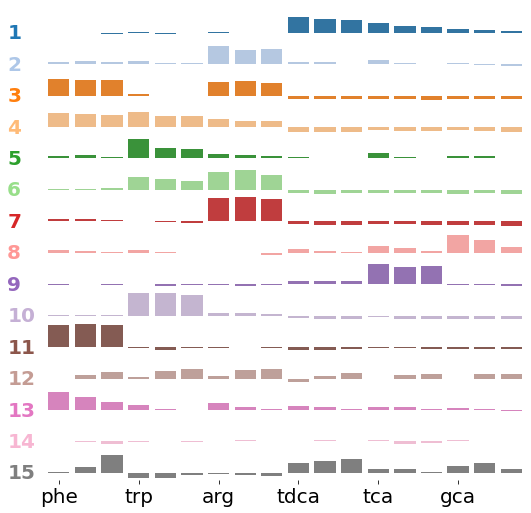

In [6]:
%matplotlib inline
cluster_cmap = 'tab20'
cluster_mean_df_raw = caclust.get_cluster_mean_df(H, communities_raw)
fig = caclust.plot_cluster_tuning(cluster_mean_df_raw, cmap=cluster_cmap)
fig_dir = "/home/hubo/Projects/Ca_imaging/results/JH_analysis/figures"
fig.savefig(os.path.join(fig_dir, "cluster_mean.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:9.130e-01 t=1.117e-01
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:3.965e-01 t=8.823e-01
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:3.552e-01 t=-9.651e-01
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:2.268e-01 t=-1.280e+00
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:1.964e-01 t=-1.375e+00
11_arg-phe vs. 11_phe-trp: t-test independent samples, P_val:6.247e-01 t=-5.033e-01
12_arg-phe vs. 12_phe-trp: t-test independent samples, P_val:5.566e-01 t=6.064e-01
13_arg-phe vs. 13_phe-trp: t-test independent samples, P_val:9.506e-01 t=6.336e-02
14_arg-phe vs. 14_phe-trp: t-test independent samples, P_val:2.669e-01 t=1.170e+00
15_arg-phe vs. 15_phe-trp: t-test independent samples, P_val:4.244e-01 t=8.4

10_phe-arg vs. 10_naive: t-test independent samples, P_val:3.520e-02 t=2.301e+00
11_phe-arg vs. 11_naive: t-test independent samples, P_val:1.013e-02 t=-2.940e+00


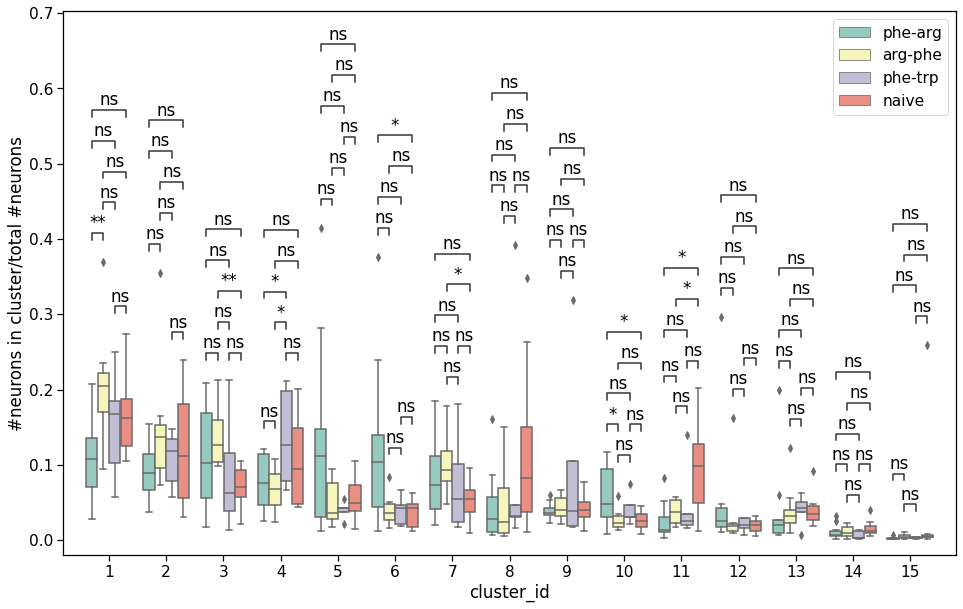

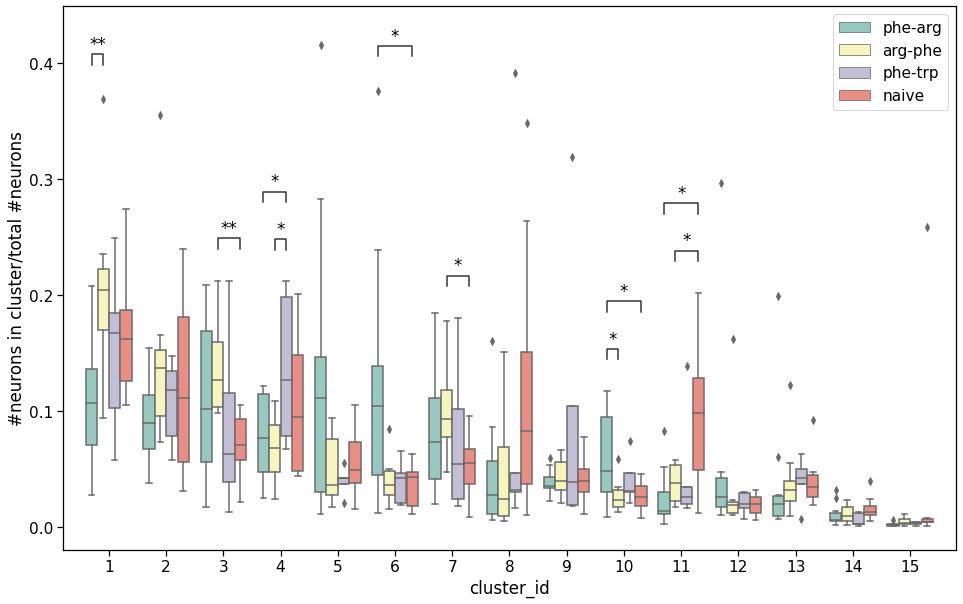

In [7]:
importlib.reload(caclust)
from itertools import combinations
labels = communities_raw


n_clusters = len(np.unique(labels))
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df

cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

for cluster_id in range(1, n_clusters+1):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df

annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs, cond_list)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs, cond_list)
fig2.savefig(os.path.join(fig_dir, "cluster_cont.svg"))

In [57]:
cluster_df.to_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [58]:
cluster_df = pd.read_pickle('../../../results/JH_analysis/cluster_df_{}.pkl'.format(region))

In [68]:
from skimage.io import imsave
import catrace.nrn_coord as caroi
importlib.reload(caroi)
%matplotlib inline
data_root_dir = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/'
cluster_stack_dir = '/home/hubo/Projects/Ca_imaging/results/JH_analysis/cluster_stack'
save_fig = True
for exp_name, cond in dtpar.exp_list:
    print(exp_name)
    exp_dir = os.path.join(data_root_dir, exp_name, region)
    stack_name = f'{region}_{exp_name}'
    meta_df = cluster_df.loc[cluster_df['fish_id'] == expname]
    mstack = caroi.map_meta_to_roi_stack(exp_dir, meta_df, 'cluster_id')
    # np.save(mstack, os.path.join(cluster_stack_dir, 'stacks', '{region}_{expname}.npz'))
    imsave(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'), mstack)
    fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)
    if save_fig:
        fig.savefig(os.path.join(cluster_stack_dir, 'figures', f'{stack_name}.svg'))
    plt.close()

2021-02-05-DpOBEM-JH9
2021-03-18-DpOBEM-JH10
2021-03-19-DpOBEM-JH10
2021-04-02-DpOBEM-JH11
2021-04-03-DpOBEM-JH11
2021-05-01-DpOBEM-JH13
2021-05-22-DpOBEM-JH14
2021-07-15-DpOBEM-N2
2021-07-16-DpOBEM-N3
2021-07-30-DpOBEM-JH17
2021-07-31-DpOBEM-JH17
2021-09-02-DpOBEM-JH18
2021-09-03-DpOBEM-JH18
2021-09-04-DpOBEM-JH18
2021-09-15-DpOBEM-JH20
2021-09-17-DpOBEM-JH20
2021-09-18-DpOBEM-JH20
2021-09-29-DpOBEM-JH21
2021-10-01-DpOBEM-JH21
2021-10-02-DpOBEM-JH21
2021-11-10-DpOBEM-JH23
2021-11-14-DpOBEM-JH23
2021-11-24-DpOBEM-JH24
2021-11-27-DpOBEM-JH24
2021-11-26-DpOBEM-JH24
2021-12-10-DpOBEM-N4
2021-12-31-DpOBEM-N7
2022-01-23-DpOBEM-N8
2022-01-30-DpOBEM-N9
2022-02-13-DpOBEM-N10
2022-02-20-DpOBEM-N11


In [37]:
%matplotlib qt5
exp_name = '2021-07-31-DpOBEM-JH17'
stack_name = f'{region}_{exp_name}'
mstack = imread(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'))
fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)